In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils.vis_utils import plot_model

In [2]:
# Downloading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Rescale and reshape the image
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


### Тестирование 6 моделей с разными значениями noise_factor

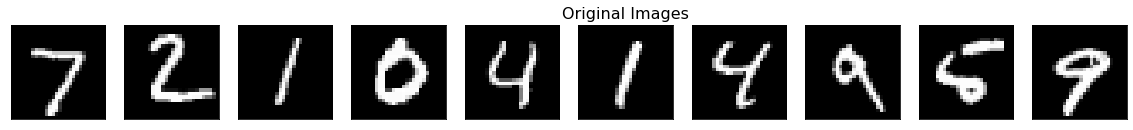

In [3]:
# plot original image
# number of example digits to show
n = 10
plt.figure(figsize=(20, 7))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original Images', fontsize=16)

In [4]:
# Mean Squared Error
def mse(imageA, imageB):
    imageA = imageA.reshape(28, 28)
    imageB = imageB.reshape(28, 28)
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [5]:
noise_factors = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [6]:
# Training models, building noisy and filtered images
def noise_factor_models(noise_factor, n, x_train=x_train, x_test=x_test):
    x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
    x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
    x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
    x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

    input_size = 784
    hidden_size = 128
    code_size = 32

    # Define model
    input_img = Input(shape=(input_size,))
    hidden_1 = Dense(hidden_size, activation='relu')(input_img)
    code = Dense(code_size, activation='relu')(hidden_1)
    hidden_2 = Dense(hidden_size, activation='relu')(code)
    output_img = Dense(input_size, activation='sigmoid')(hidden_2)
    
    # Compile and fit the mode
    autoencoder = Model(input_img, output_img)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    history = autoencoder.fit(x_train_noisy, x_train, epochs=10, verbose=0)

    mse_list = []
    plt.figure(figsize=(20, 7))
    images = autoencoder.predict(x_test_noisy)
    for i in range(n):
        # plot noisy image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n//2:
            ax.set_title('Noisy Input: noise factor = %.1f' % (noise_factor), fontsize=16)

        mse_list.append(mse(x_test[i], images[i]))
        
        # plot noisy image
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n//2:
            ax.set_title('Autoencoder Output: noise factor = %.1f' % (noise_factor), fontsize=16)

    return history.history['loss'][-1], mse_list

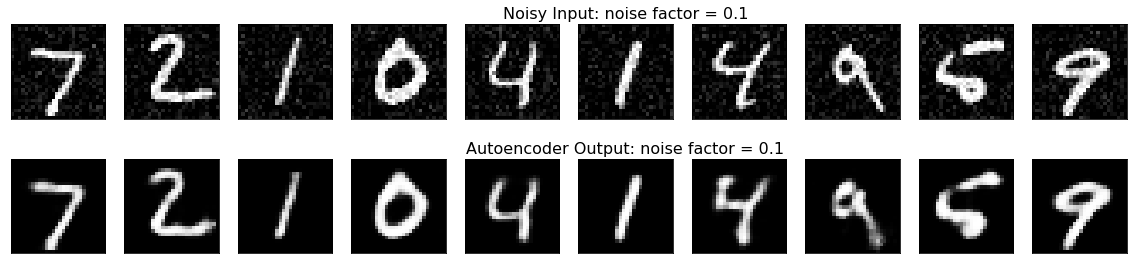

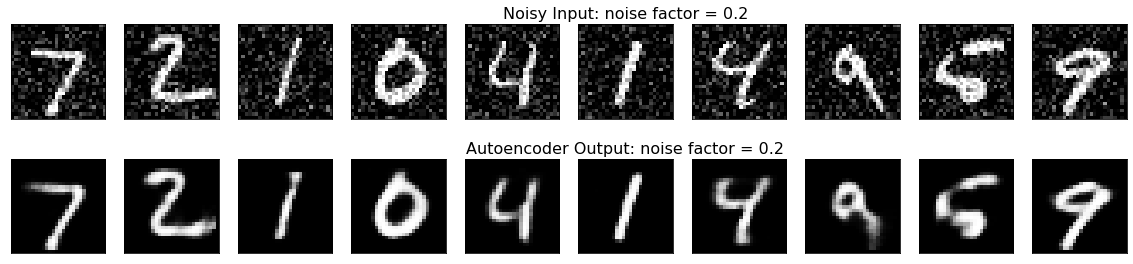

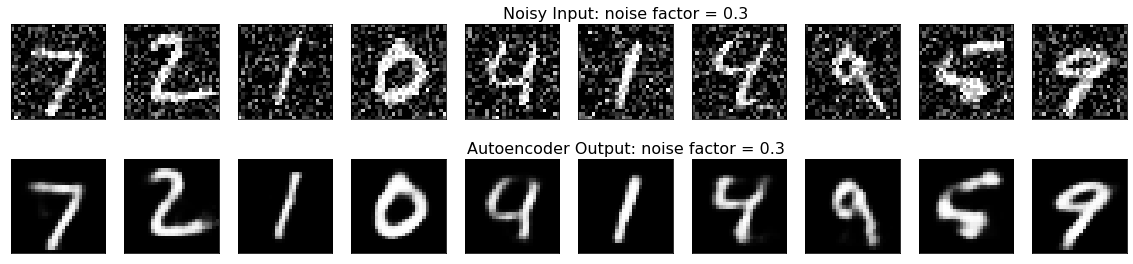

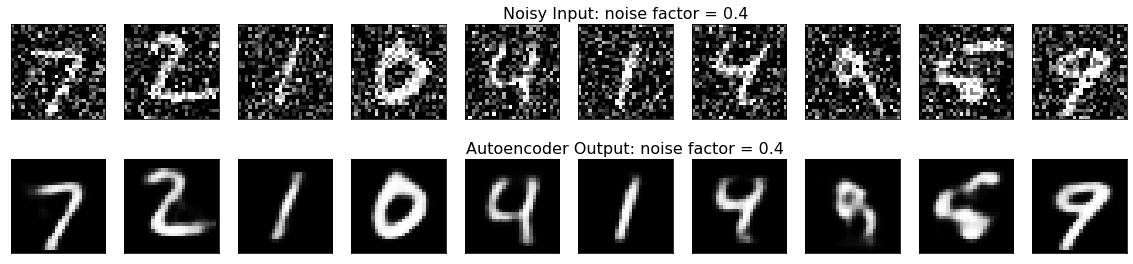

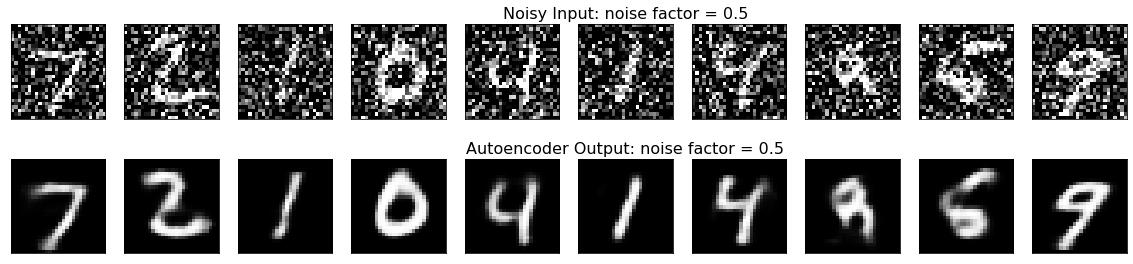

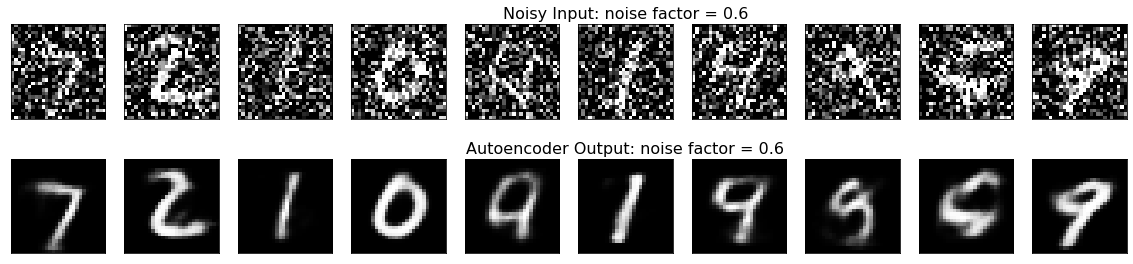

In [7]:
# list of final values of loss-functions of 6 models
loss_list = []
# list of MSE for 10 images from the test set of each of the models
mse_result = []
for noise_factor in noise_factors:  
     result = noise_factor_models(noise_factor, 10)
     loss_list.append(result[0])
     mse_result.append(result[1])

### Сравнение конечных значений loss-функций

In [8]:
np.array(loss_list)

array([0.08857513, 0.09678052, 0.10156386, 0.11005262, 0.11968541,
       0.12636414])

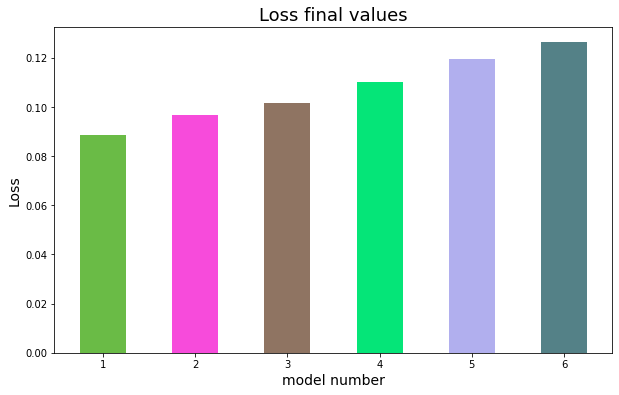

In [56]:
# plot of final values of loss-functions of 6 models
plt.figure(figsize=(10, 6))
color_rectangle = np.random.rand(6, 3) # RGB   
plt.bar(range(1, 7), loss_list, color = color_rectangle, width = 0.5)
plt.title('Loss final values', fontsize=18)
plt.xlabel('model number', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

### Сравнение качества фильтрования изображений каждой из моделей 
### Построение зависимости MSE от noise_factor

In [10]:
np.array(mse_result)

array([[0.00390475, 0.0113226 , 0.00193607, 0.00705291, 0.00837688,
        0.00131132, 0.01624707, 0.01228944, 0.01458617, 0.00825779],
       [0.00509867, 0.01593805, 0.00344925, 0.01053418, 0.0092621 ,
        0.00185084, 0.01201226, 0.01606945, 0.01857076, 0.00892433],
       [0.00552353, 0.01444529, 0.00410569, 0.01056553, 0.01009731,
        0.00353866, 0.01339872, 0.01827342, 0.01922905, 0.0110705 ],
       [0.01240942, 0.01712222, 0.00662948, 0.01755339, 0.01362614,
        0.00509404, 0.02224938, 0.02676242, 0.0252678 , 0.01365981],
       [0.01441495, 0.03103682, 0.00417102, 0.0187576 , 0.0125085 ,
        0.00543605, 0.02281227, 0.03357067, 0.04385095, 0.02040328],
       [0.0149193 , 0.02431393, 0.00949445, 0.01725994, 0.02268824,
        0.00669776, 0.02341729, 0.03952518, 0.03658308, 0.02080039]])

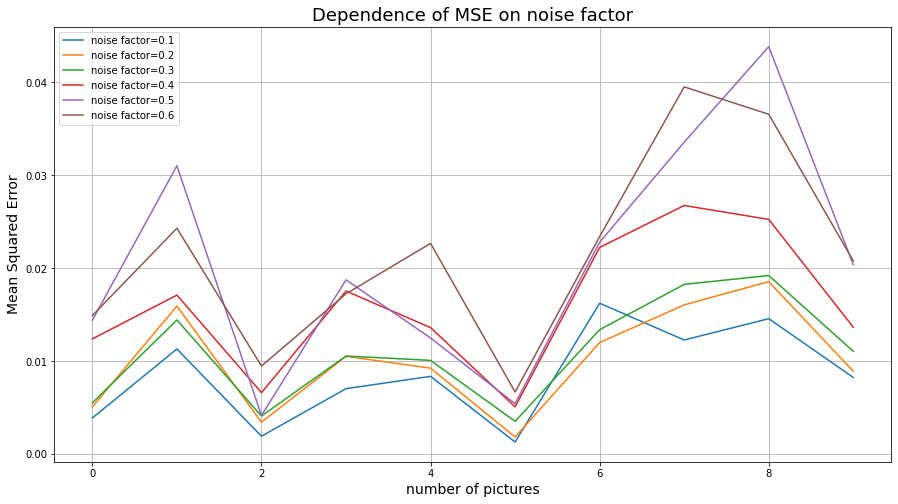

In [12]:
# plot of MSE versus noise_factor
plt.figure(figsize=(15, 8))
for idx, mse in enumerate(mse_result):
    plt.plot(mse, label = 'noise factor=%s' % noise_factors[idx])
plt.title('Dependence of MSE on noise factor', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('number of pictures', fontsize=14)
plt.legend()
plt.grid()
plt.show()